#Name-Rahul
###Email - rahul.ds22@duk.ac.in
###Roll.no-223043
###Group: DA05

# TUTORIAL 5 - Classification and Regression

## Tutorial 5.1 Correlation Using SciPy Function 

In [70]:
# imports two packages, scipy.stats and numpy
import scipy.stats
import numpy as np
#creates a 15x2 array called a using the np.zeros
a = np.zeros([15,2])
a[:,0] = np.array([5,2,4,4,3,5,2,2,4,2,4,4,4,4,3])
a[:,1] = np.array([3,2,5,3,2,6,1,2,5,2,3,4,3,3,4])
#computes the Pearson correlation coefficient and p-value between the two columns of the array
r, p = scipy.stats.pearsonr(a[:,0], a[:,1])
print('r=',round(r,3),'@',round(p,3),'level of significance')

#calculating and printing the correlation and significance level between two sets of data represented in a numpy array.



r= 0.716 @ 0.003 level of significance


## Tutorial 5.2 Linear regression - Using statsmodels / ols

In [74]:
#imports two packages, pandas and statsmodels.
import pandas as pd
#ols function to perform ordinary least squares
from statsmodels.formula.api import ols

#This code imports the pandas and statsmodels packages.
#pandas is imported as pd, while ols is imported from statsmodels.formula.api.
#The ols function is used to perform ordinary least squares regression analysis, which is a technique used to analyze the relationship between two or more variables.

In [78]:
"""
This code creates a DataFrame called d using the pd.DataFrame() function.
Two columns are added to d called project_plan and project_outcome, and values are inserted into these columns.

Then, the ols function from the statsmodels.formula.api module is used to fit a linear regression model to the data.
The formula "project_outcome ~ project_plan" specifies that the project_outcome variable is the dependent variable, 
and the project_plan variable is the independent variable.

The data parameter of the ols function is set to d, which means that the regression analysis will be performed on 
the project_plan and project_outcome columns of the d DataFrame.

The fit() method is then called on the ols object, which fits the linear regression model to the data and returns 
a RegressionResults object called m.

Finally, the predict() method is called on m with the project_plan column of d as an argument. This method returns 
an array of predicted values for project_outcome based on the linear regression model.
"""

#create a dataframe
d  = pd.DataFrame()
#inserting values into dataframe
d['project_plan'] = [5,2,4,4,3,5,2,2,4,2,4,4,4,4,3]
d['project_outcome'] = [3,2,5,3,2,6,1,2,5,2,3,4,3,3,4]
#fits a linear regression model using the ols function
m = ols("project_outcome ~ project_plan", data=d).fit()
#returns an array of predicted values for project_outcome based on the linear regression model.
m.predict(d.project_plan) 


0     4.622881
1     1.838983
2     3.694915
3     3.694915
4     2.766949
5     4.622881
6     1.838983
7     1.838983
8     3.694915
9     1.838983
10    3.694915
11    3.694915
12    3.694915
13    3.694915
14    2.766949
dtype: float64

In [25]:
#retrieves the adjusted R-squared value of the fitted linear regression model m
m.rsquared_adj 

0.4757467109162026

In [26]:
#retrieves f value
m.fvalue 

13.704648862512366

In [27]:
#retrives p value
m.f_pvalue

0.0026599897765116577

In [28]:
#retrieves the t-values associated with the coefficients of the fitted linear regression model
m.tvalues 

Intercept      -0.018705
project_plan    3.701979
dtype: float64

## Tutorial 5.3 Detailed Regression Analysis – Using statsmodels / OLS


In [79]:
from google.colab import files
uploaded = files.upload()

#importing local file to Colab

Saving itprojects.csv to itprojects (1).csv


In [56]:
#Data Setup
import pandas as pd
d=pd.read_csv('itprojects.csv')
#calls column names
d.columns


Index(['Case_No', 'change_mgmt', 'project_plan', 'tech_mentoring', 'pm_tools',
       'dev_process', 'system_arch', 'design_think', 'team_skills',
       'core_team', 'prior_exp', 'rewards_recog', 'project_type',
       'project_perf'],
      dtype='object')

In [57]:
#setup independent variables
X = d[['change_mgmt', 'project_plan', 'tech_mentoring', 'pm_tools', 
       'dev_process', 'system_arch', 'design_think', 'team_skills', 
       'core_team', 'prior_exp', 'rewards_recog']]


## Tutorial 5.3.2 The Distribution of the Feature Variables (X) 

In [80]:
#both libraries are used to plot graphs
import matplotlib.pyplot as plt
import seaborn as sb
#  both matplotlib.pyplot and seaborn are useful tools for visualizing data in Python, and they can be used together to create powerful and informative visualizations.


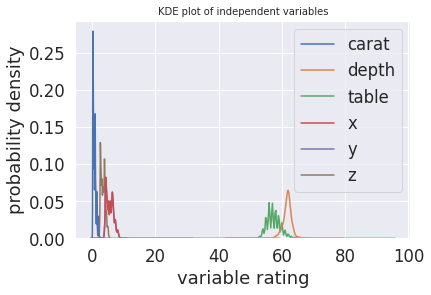

In [82]:
"""
This code creates a kernel density estimate (KDE) plot using the seaborn (sb) library and matplotlib.pyplot (plt).

The kdeplot() function from seaborn is used to plot the distribution of the data in the X variable.The parameter 
data is set to X, which is assumed to be a pandas DataFrame or a numpy array.

The xlabel() and ylabel() functions from matplotlib.pyplot are used to label the x and y axes of the plot with
'variable rating' and 'probability density', respectively.

The title() function is used to set the title of the plot to 'KDE plot of independent variables' with a font size 
of 10.

Finally, the show() function from matplotlib.pyplot is used to display the plot.
"""

sb.kdeplot(data=X)
plt.xlabel('variable rating')
plt.ylabel('probability density')
plt.title ('KDE plot of independent variables', size=10)
plt.show()


#  Tutorial 5.3.3 Linear Regression (using OLS)


In [83]:
import statsmodels.api as sm  
#Data Setup
d=pd.read_csv("/content/itprojects.csv")
#calls column names
d.columns



Index(['Case_No', 'change_mgmt', 'project_plan', 'tech_mentoring', 'pm_tools',
       'dev_process', 'system_arch', 'design_think', 'team_skills',
       'core_team', 'prior_exp', 'rewards_recog', 'project_type',
       'project_perf'],
      dtype='object')

In [60]:
X=d[['change_mgmt', 'project_plan', 'tech_mentoring', 'pm_tools',
       'dev_process', 'system_arch', 'design_think', 'team_skills',
       'core_team', 'prior_exp', 'rewards_recog']]

In [61]:
# Add a column of constants, as a place holder for intercept
X['intercept'] = 1  
# the dependent variable is project performance
y = d.project_perf 
#discard missing value if any
model = sm.OLS(y,X,missing='drop') 
result=model.fit()
round(result.f_pvalue,3) # 0.0 p-value of F test



<ipython-input-61-70c3c7bc4f73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


0.0

In [62]:
round(result.pvalues,3)  # p-value of t-Tests, last one is intercept

change_mgmt       0.359
project_plan      0.000
tech_mentoring    0.008
pm_tools          0.614
dev_process       0.734
system_arch       0.899
design_think      0.771
team_skills       0.005
core_team         0.033
prior_exp         0.149
rewards_recog     0.243
intercept         0.000
dtype: float64

In [63]:
result.rsquared_adj #since value>0.5, variation explained by the model

0.5356789942420455

In [64]:
result.params #coefficients of independent variables

change_mgmt       0.082152
project_plan      0.679649
tech_mentoring    0.266363
pm_tools          0.055683
dev_process       0.046456
system_arch       0.018967
design_think      0.040867
team_skills       0.332597
core_team         0.292540
prior_exp        -0.227997
rewards_recog     0.106306
intercept        -7.294942
dtype: float64

In [65]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           project_perf   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     11.38
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           7.49e-13
Time:                        17:29:59   Log-Likelihood:                -97.646
No. Observations:                 100   AIC:                             219.3
Df Residuals:                      88   BIC:                             250.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
change_mgmt        0.0822      0.089      0.922      0.359      -0.095       0.259
project_plan       0.6796      0.091      7.458      0.000       0.499       0.861
tech_mentoring     0.2664      0.098      2.710      0.008       0.071       0.462
pm_tools           0.0557      0.110      0.506      0.614      -0.163       0.274
dev_process        0.0465      0.137      0.340      0.734      -0.225       0.318
system_arch        0.0190      0.149      0.127      0.899      -0.278       0.316
design_think       0.0409      0.140      0.292      0.771      -0.237       0.319
team_skills        0.3326      0.115      2.904      0.005       0.105       0.560
core_team          0.2925      0.135      2.165      0.033       0.024       0.561
prior_exp         -0.2280      0.157     -1.455      0.149      -0.539       0.083
rewards_recog      0.1063      0.090      1.176      0.243      -0.073       0.286
intercept         -7.2949      1.088     -6.706      0.000      -9.457      -5.133
==============================================================================
Omnibus:                       10.101   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.660
Skew:                          -0.086   Prob(JB):                        0.160
Kurtosis:                       2.079   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Overall significance of model: Probability of F-statistic <0.05
This implies that regression model is significant at 0.05 levels.

2. Significance of individual predictors must be<0.05
Only 4 variables have p-value less than 0.05:- project_plan,team_skills,tech_mentoring,core_team

# Tutorial 5.3.4 Discarding the Variables that are Not Significant


In [66]:
import pandas as pd
import statsmodels.api as sm  # for regression
d=pd.read_csv('/content/itprojects.csv') #read dataset
d.columns 


Index(['Case_No', 'change_mgmt', 'project_plan', 'tech_mentoring', 'pm_tools',
       'dev_process', 'system_arch', 'design_think', 'team_skills',
       'core_team', 'prior_exp', 'rewards_recog', 'project_type',
       'project_perf'],
      dtype='object')

In [67]:
"""
This code performs a multiple linear regression analysis on the data contained in the pandas DataFrame d.

First, the independent variables for the regression analysis are specified as X, which is a DataFrame 
containing the columns 'project_plan', 'tech_mentoring', 'team_skills', and 'core_team'. An intercept 
column is added to X to represent the constant term in the regression model.

The dependent variable is specified as y, which is the 'project_perf' column of d.

The sm.OLS() function is then used to specify the regression model. The missing='drop' argument specifies 
that any rows containing missing data should be dropped before fitting the model.

The fit() method is called on the OLS model object returned by sm.OLS() to perform the regression analysis 
and store the results in result.

Finally, result.summary() is used to print a summary of the regression results, including information such 
as the coefficients, standard errors, and p-values for each independent variable, as well as goodness-of-fit
 statistics such as R-squared and the F-statistic.
""" 

X = d[['project_plan', 'tech_mentoring','team_skills','core_team' ]]
X['intercept'] = 1  #adding a column of intercepts as a placeholder of intercept
y = d.project_perf #dependent variable is preoject performance
model  = sm.OLS(y,X,missing='drop') #discard missing values if any 
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           project_perf   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     30.53
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.47e-16
Time:                        17:30:11   Log-Likelihood:                -100.57
No. Observations:                 100   AIC:                             211.1
Df Residuals:                      95   BIC:                             224.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
project_plan       0.7151      0.077      9.

<ipython-input-67-6f81669c3d98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1  #adding a column of intercepts as a placeholder of intercept


1. Overall Significance of Model:
Probability of F-statistic	<	0.05

2. Significance of individual predictors
 All	4 variables have p-values less than	0.05

3. Strength of association
 Adjusted R-squared	=	0.544
 Since it is above	50%, explanatory power of the model is acceptable

4. Regression Model
 project_perf	=	-6.7584	+	0.7151*project_plan	+	0.2430*tech_monitoring	+	0.3196*team_skills	+	0.25S

5. Durbin-Watson to test autocorrelation	(ideal value	=	2)
 value	=	1.760	> acceptable

6. Omnibus & DB to check skewness and kurtosis
 Omnibus test p-value	=	0.001	(<	0.05)
	3B test works for large data samples	(>2000) only
 So, skewness and kurtosis are within limits expected of a normal distribution 


# **Tutorial 11.1  ML Regression: Stochastic Gradient Descent (SGD)**

# Tutorial 11.1.1 Data Setup

In [68]:
import numpy as np
import seaborn as sb
from sklearn.linear_model import  SGDRegressor # import SGD Regressor
from sklearn.preprocessing   import StandardScaler #import StandardScaler to scale input features X 
d = sb.load_dataset('diamonds')
d = d.dropna()


# Tutorial 11.1.2 data preparation and ML model building

In [69]:
X = d[['carat','depth','table', 'x', 'y', 'z']] #independent variables
y = d.price #dependent variable
Xz = StandardScaler().fit(X).transform(X) #standardise features using zscore transformation
regressor = SGDRegressor(max_iter=50) #setup SGD regressor
model = regressor.fit(Xz, y) #run regression
model.score(Xz,y) #check regression score and regression results

0.8591451393415851

In [33]:
np.round(model.intercept_,1) #rounds the intercept value of the linear regression model to one decimal place using the np.round() function.

array([3959.7])

In [34]:
np.round(model.coef_,1)  #round off coefficients for the linear regression model


array([ 5059.1,  -254.7,  -246.1, -1419.1,    48.4,    47.8])

In [35]:
model.get_params() # to get model parameters

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 50,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [84]:
model.n_iter_ #number of iterations

19

INFERENCE: SGD converged in 22 iterations. Model score is 0.858

# Tutorial 11.2  ML Regression using SGD – Example 2


Tutorial 11.2.1 Data Setup


In [37]:
import numpy as np
import seaborn as sb
from sklearn.linear_model import  SGDRegressor #import SGD Regressor
from sklearn.preprocessing   import StandardScaler #import StandardScaler to scale input features 
d = sb.load_dataset('diamonds')
d = d.dropna() #drop null-valued rows

 Tutorial 11.2.2 data preparation and ML model building


In [38]:
#converting category labels to integers for use in regression model
d['cuti'] = d.cut.astype("category").cat.codes
d['colori'] = d.color.astype("category").cat.codes
d['clarityi'] = d.clarity.astype("category").cat.codes
X = d[['carat','depth','table', 'x', 'y', 'z','cuti','colori','clarityi']] #independent variables
y = d.price #dependent variables
Xz = StandardScaler().fit(X).transform(X) #standardize features using zscore transformation
regressor = SGDRegressor(max_iter=50) #setup SGD regressor
model = regressor.fit(Xz, y) #run regression
model.n_iter_     #number of iterations

23

In [39]:
model.score(Xz,y) #check regression score

0.906903635290851

In [40]:
np.round(model.intercept_,1)#rounds the intercept value of the linear regression model to one decimal place using the np.round() function.

array([3930.7])

In [41]:
np.round(model.coef_,1)  #round off coefficients for the linear regression


array([5057.1, -123.5,  -59.4, -957.1,   53.1,  -31.5, -131.7, -563.3,
       -852.1])

In [42]:
model.get_params() # to get model parameters


{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 50,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

 Inference: 
SGD method parameters and model coefficients are listed above.  SGD converged in 18 iterations. Score is 0.9066


# **TUTORIAL 6- Classification Models**

#Tutorial 6.1 The Iris Flowers Data Description 


In [43]:
import pandas as pd
import seaborn as sb
pdf = sb.load_dataset('iris')
import matplotlib.pyplot as plt
# Here we provided the famous Iris dataset from Seaborn and imports the necessary libraries to work with it. 
# Pandas is a powerful library for data manipulation and analysis, while Seaborn and Matplotlib are popular data visualization libraries.


In [44]:
pdf.info()    # Here we provide the information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
sb.set(font_scale = 1.5)  #command that sets the font scale of Seaborn plots to 1.5 times the default size.

<Axes: ylabel='Density'>

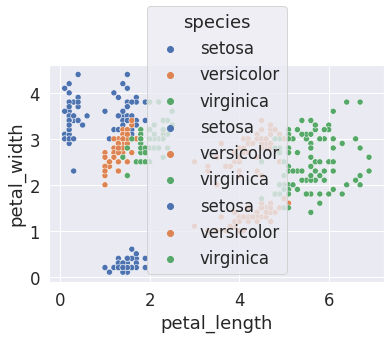

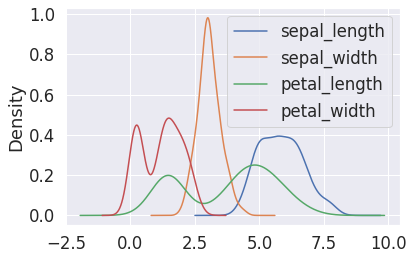

In [46]:
# This command creates a scatter plot of petal length versus petal width, with each point colored according to the species of Iris.
sb.scatterplot(x='petal_length', y='petal_width', data=pdf, hue='species')

# This command creates a scatter plot of petal length versus sepal width, with each point colored according to the species of Iris.
sb.scatterplot(x='petal_length', y='sepal_width', data=pdf, hue='species')

#This command creates a scatter plot of petal width versus sepal width, with each point colored according to the species of Iris.
sb.scatterplot(x='petal_width',  y='sepal_width', data=pdf, hue='species')

# This command plot of all the variables in the Iris dataset,imposed on top of each other.
pdf.plot(kind='kde')  # prob. density fn of all variables, super-imposed




## Tutorial 6.2 The Iris Flower Classification

In [47]:
import pandas as pd
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix  #evaluate the performance of a classification model.


In [48]:
pdf=sb.load_dataset('iris')

In [49]:
pdf.info()
pdf.columns  # list of the column names in the pdf dataframe.
pdf.species.unique() #'setosa', 'versicolor', 'virginica'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
# This code creates a new dataframe X that contains only the four numeric columns ('sepal_length', 'sepal_width', 'petal_length', and 'petal_width') from the original pdf dataframe.
X = pdf[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = pdf.species  # Thia code creates a new Series 'y' that contains the 'species' column from the original pdf dataframe


## Tutorial 6.2.1 Multiple LogisticRegression


In [51]:
# importing LogisticRegression,because LogisticRegression is a popular machine learning algorithm for binary classification problems.
from sklearn.linear_model import LogisticRegression


In [52]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y) # This code trains the logistic regression model on the Iris dataset.


LogisticRegression(random_state=0, solver='liblinear')

In [53]:
model.classes_       # ( 'setosa', 'versicolor', 'virginica')


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
#A confusion matrix is a table that summarizes the performance of a classification model by comparing the predicted labels to the true labels.
confusion_matrix(y, model.predict(X))


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [13]:
# The code print generates a classification report that summarizes the performance of the logistic regression model on the Iris dataset.
print(classification_report(y, model.predict(X)))   # Here we can see the accuracy of this model is 96%.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.90      0.94        50
   virginica       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## Tutorial 6.2.2 Linear Discriminant Analysis

In [14]:
# Linear discriminant analysis (LDA) is a technique used in statistics, pattern recognition, and machine learning to find a linear combination of features that can be used to separate two or more classes of objects or events
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Setup LDA classifier
model = LinearDiscriminantAnalysis(solver='svd')


In [15]:
model.fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [16]:
print(classification_report(y, model.predict(X))) # Here we can see the accuracy of this model is 97%.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



## Tutorial 6.2.3 Decision Tree Classification

In [17]:
#A decision tree classifier is a type of supervised learning algorithm that is used for classification tasks. 
#This algorithm builds a tree-like model of decisions and their possible consequences, based on the features of the data.
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()

In [18]:
model.fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [19]:
print(classification_report(y, model.predict(X)))  # Here we can see the accuracy of this model is 100%.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Tutorial 6.2.4 Support Vector Classification

In [20]:
#Support vector machines (SVMs) are a type of supervised learning algorithm that can be used for both classification and regression tasks. 
#The basic idea behind SVMs is to find a hyperplane that separates the data into different classes with the largest possible margin.
from sklearn.svm import SVC 	#SVM Model Import
model = SVC(kernel = 'rbf')

In [21]:
model.fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

In [22]:
print(classification_report(y, model.predict(X))) # Here we can see the accuracy of this model is 100%.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
   virginica       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

